In [5]:
#Importing relevant packages for datamining
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
import csv

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8, 6)

In [6]:
File = '/Users/StanleyL/Downloads/WISDM_ar_latest/WISDM_ar_v1.1/raw_data_fixed.txt'
df = pd.read_csv(File, lineterminator=';', header=None, names=['user', 'activity', 'timestamp', 'xaccel', 'yaccel', 'zaccel', 'NA'])
del df['NA']

In [7]:
print('Shape of data frame is:', df.shape, sep=" ")
df[['xaccel', 'yaccel', 'zaccel']].describe()

Shape of data frame is: (1098207, 6)


,xaccel,yaccel,zaccel
count,1.098207e+06,1.098207e+06,1.098207e+06
mean,6.628616e-01,7.255625e+00,4.110699e-01
std,6.849048e+00,6.746219e+00,4.754114e+00
min,-1.961000e+01,-1.961000e+01,-1.980000e+01
25%,-2.870000e+00,3.170000e+00,-2.220000e+00
50%,2.700000e-01,7.930000e+00,0.000000e+00
75%,4.440000e+00,1.156000e+01,2.720000e+00
max,1.995000e+01,2.004000e+01,1.961000e+01


In [8]:
def create_segments(df):
    ''' Convert timestamp to second, sort by user and time and create 10-second segments
    '''
    # Converting timestamp in nano-second to second
    df['time_seconds'] = df['timestamp'] * 1e-9
    # Sorting data by user and timestamp
    df = df.sort_values(by=['user', 'time_seconds']).reset_index(drop=True)
    # create segments which pertain to 200 sampling rate. Assigning each value a "segment" or second value 
    segment_length = 200
    df['seq'] = df.index
    #assignments each segment of 200 datapoints to an index 
    df['segment'] = df.groupby(['user', 'activity'])['seq'].transform(lambda x: (x // segment_length).astype(int))
    return df

In [9]:
df_segmented = create_segments(df)
#note only change is segment is shifted by 1
print('Shape of data frame is now:', df_segmented.shape, sep=" ")
df_segmented.head()

Shape of data frame is now: (1098207, 9)


,user,activity,timestamp,xaccel,yaccel,zaccel,time_seconds,seq,segment
0,1,Walking,4991922345000,0.69,10.80,-2.03,4991.922345,0,0
1,1,Walking,4991972333000,6.85,7.44,-0.50,4991.972333,1,0
2,1,Walking,4992022351000,0.93,5.63,-0.50,4992.022351,2,0
3,1,Walking,4992072339000,-2.11,5.01,-0.69,4992.072339,3,0
4,1,Walking,4992122358000,-4.59,4.29,-1.95,4992.122358,4,0


In [10]:
#Looking through specific user #33
df_user = df_segmented[df_segmented.user == 33]
print(df_user.head())
print(df_user.shape)

        user  activity     timestamp  xaccel  yaccel  zaccel  time_seconds  \
978151    33  Standing  504382335000    0.11    9.89    1.46    504.382335   
978152    33  Standing  504432262000    0.11    9.92    1.46    504.432262   
978153    33  Standing  504482280000    0.08    9.92    1.46    504.482280   
978154    33  Standing  504532298000    0.04    9.89    1.46    504.532298   
978155    33  Standing  504582316000    0.08    9.92    1.46    504.582316   

           seq  segment  
978151  978151     4890  
978152  978152     4890  
978153  978153     4890  
978154  978154     4890  
978155  978155     4890  
(29453, 9)


In [11]:
#For user #33 looking at his jogging activity
df_user_activity = df_user[df_user.activity == 'Sitting']
print(df_user_activity.head())
print(df_user_activity.shape)

        user activity     timestamp  xaccel  yaccel  zaccel  time_seconds  \
979763    33  Sitting  612432323000    4.99    3.02    7.86    612.432323   
979764    33  Sitting  612482402000    5.22    3.26    8.05    612.482402   
979765    33  Sitting  612532329000    5.24    3.15    8.16    612.532329   
979766    33  Sitting  612582378000    5.33    3.57    8.05    612.582378   
979767    33  Sitting  612632365000    5.63    2.98    7.46    612.632365   

           seq  segment  
979763  979763     4898  
979764  979764     4898  
979765  979765     4898  
979766  979766     4898  
979767  979767     4898  
(3248, 9)


array([[<Axes: xlabel='time_seconds'>],
       [<Axes: xlabel='time_seconds'>],
       [<Axes: xlabel='time_seconds'>]], dtype=object)

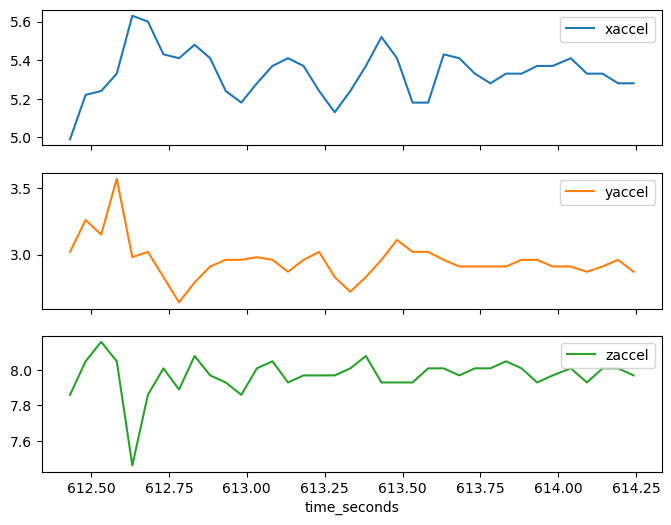

In [12]:
#For user #33 when he is sitting, plotting his X accl, Y accel, Z accel 
df_user_activity[df_user_activity.segment==4898].plot(x='time_seconds', y=['xaccel',  'yaccel',  'zaccel'], subplots=True, layout=[3,1])

In [13]:
#The segments in which this user is exhibiting sitting 
print(df_user_activity['segment'].unique())
# FIXME remove this for loop with a lambda function
for x in df_user_activity.segment.unique():
    print(df_user_activity[df_user_activity.segment == x][['xaccel','yaccel', 'zaccel']].describe())

[4898 4899 4900 4901 4902 4903 4904 4905 4906 4907 4908 4909 4910 4911
 4912 4913 4914 4915]
          xaccel     yaccel     zaccel
count  37.000000  37.000000  37.000000
mean    5.333514   2.954595   7.969189
std     0.125282   0.151136   0.107687
min     4.990000   2.640000   7.460000
25%     5.240000   2.910000   7.930000
50%     5.330000   2.960000   7.970000
75%     5.410000   2.980000   8.010000
max     5.630000   3.570000   8.160000
           xaccel      yaccel      zaccel
count  200.000000  200.000000  200.000000
mean     5.548800    2.837650    7.876650
std      0.138228    0.069137    0.076888
min      5.240000    2.560000    7.670000
25%      5.430000    2.790000    7.820000
50%      5.600000    2.830000    7.860000
75%      5.630000    2.870000    7.930000
max      5.940000    3.150000    8.050000
           xaccel      yaccel      zaccel
count  200.000000  200.000000  200.000000
mean     5.595950    2.834250    7.846300
std      0.037539    0.032523    0.032007
min      5

In [14]:
print(len(df_segmented['segment'].unique()),len(df_segmented['user'].unique()))
range((df_segmented['segment'].unique()).shape[0])
print(df_segmented.columns)

5492 36
Index(['user', 'activity', 'timestamp', 'xaccel', 'yaccel', 'zaccel',
       'time_seconds', 'seq', 'segment'],
      dtype='object')


In [15]:
def create_new_features(df_old):
    # Sorting data by user and segment
    accel_cols = ['xaccel', 'yaccel', 'zaccel']
    df_new = df_old.loc[:, accel_cols + ['user', 'segment', 'activity']].groupby(['user', 'segment', 'activity'])
    
    # Acceleration means
    means = df_new[accel_cols].mean()
    
    # Acceleration standard deviation
    sds = df_new[accel_cols].std()
    
    # Avg absolute difference
    avg_absolute_diff_x = df_new['xaccel'].apply(lambda x: np.mean(np.abs(x - np.mean(x))))
    avg_absolute_diff_y = df_new['yaccel'].apply(lambda x: np.mean(np.abs(x - np.mean(x))))
    avg_absolute_diff_z = df_new['zaccel'].apply(lambda x: np.mean(np.abs(x - np.mean(x))))

    # Avg resultant accel
    avg_resultant_accel = df_new.apply(lambda x: np.mean(np.sqrt(x['xaccel']**2 + x['yaccel']**2 + x['zaccel']**2)))

    # Concatenate columns
    X = pd.concat([means, sds, avg_absolute_diff_x, avg_absolute_diff_y, avg_absolute_diff_z, avg_resultant_accel], axis=1)

    X.columns = ['xavg', 'yavg', 'zavg', 'xstanddev', 'ystanddev', 'zstanddev', 
                 'xabsdiff', 'yabsdiff', 'zabsdiff', 'resultant']
    
    X = X.reset_index(level=['user', 'segment', 'activity'])
    X.drop('segment', axis=1, inplace=True)
    X = X[['user', 'xavg', 'yavg', 'zavg', 'xabsdiff', 'yabsdiff', 'zabsdiff', 
           'xstanddev', 'ystanddev', 'zstanddev', 'resultant', 'activity']]
    
    return X

In [16]:
df_new_feats = create_new_features(df_segmented)

In [17]:
#Key: "Resting = 0, Standing = 1, Walking = 2, Upstairs = 3, Downstairs = 4, Running = 5"
#Numericalizing the data to prepare it to be trained by PyTorch model 
activity_mapping = {
    'Resting': 0,
    'Standing': 1,
    'Walking': 2,
    'Upstairs': 3,
    'Downstairs': 4,
    'Running': 5}

df_new_feats_numericalized = df_new_feats
# Map the activity column to numeric values
df_new_feats_numericalized['activity'] = df_new_feats['activity'].map(activity_mapping)
print(df_new_feats_numericalized['activity'])

#Note: Remapping causes activity values to become NAN

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
5920    1.0
5921    1.0
5922    1.0
5923    1.0
5924    1.0
Name: activity, Length: 5925, dtype: float64


In [18]:
df_new_feats_numericalized.head()

,user,xavg,yavg,zavg,xabsdiff,yabsdiff,zabsdiff,xstanddev,ystanddev,zstanddev,resultant,activity
0,1,3.77465,9.94075,-0.57590,4.409069,3.338605,2.300102,5.744869,4.181244,3.294039,12.210952,2.0
1,1,3.68565,9.96810,-0.57215,4.440294,3.778500,2.497514,5.795242,4.810797,3.374514,12.308423,2.0
2,1,3.37855,10.18565,-0.70080,4.479507,3.852563,2.614720,5.788586,4.822251,3.504266,12.476000,2.0
3,1,3.04480,10.21630,-0.56065,4.396692,3.820074,2.490559,5.710777,4.848097,3.377768,12.313122,2.0
4,1,3.07425,10.20950,-0.51410,4.658277,3.792320,2.343354,5.967183,4.813447,3.332950,12.403068,2.0


In [19]:
#importing PyTorch and dependencies
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import SGD
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Variable
from sklearn.model_selection import train_test_split

In [20]:
from sklearn.preprocessing import LabelEncoder
#Spliting data into testing and training datasets 
features = df_new_feats_numericalized[['xavg', 'yavg', 'zavg','xabsdiff','yabsdiff','zabsdiff','xstanddev', 'ystanddev', 'zstanddev', 'resultant']].apply(pd.to_numeric).fillna(0) #features represent input data collumns
# Encode the target labels to integers
label_encoder = LabelEncoder()
targets = label_encoder.fit_transform(df_new_feats_numericalized['activity']) # targets represent output data columns 

In [21]:
#Normalizing Data 
def z_score_normalization(df):
    return (df - df.mean()) / df.std()

# Apply normalization
features_normalized = z_score_normalization(features)
print(features_normalized)

          xavg      yavg      zavg  xabsdiff  yabsdiff  zabsdiff  xstanddev  \
0     0.713553  0.722810 -0.452519  0.368646 -0.276009 -0.306286   0.514835   
1     0.693318  0.730122 -0.450846  0.381804 -0.087483 -0.180207   0.533161   
2     0.623497  0.788288 -0.508235  0.398328 -0.055741 -0.105352   0.530739   
3     0.547616  0.796482 -0.445716  0.363431 -0.069665 -0.184649   0.502432   
4     0.554311  0.794664 -0.424951  0.473658 -0.081560 -0.278663   0.595713   
...        ...       ...       ...       ...       ...       ...        ...   
5920 -0.402539  0.597842  0.855704 -1.404007 -1.666945 -1.574304  -1.473847   
5921 -0.455593  0.605663  0.779118 -1.406336 -1.670577 -1.670885  -1.487298   
5922 -0.441224  0.587161  0.917707 -1.448882 -1.686971 -1.733445  -1.526894   
5923 -0.453331  0.587188  0.903520 -1.452627 -1.683470 -1.728857  -1.534075   
5924 -0.465872  0.577849  0.969195 -1.312100 -1.604331 -1.637154  -1.388313   

      ystanddev  zstanddev  resultant  
0     -0.24

In [22]:
# Convert to PyTorch tensor
features_normalized = torch.tensor(features_normalized.to_numpy(), dtype=torch.float)
targets = torch.tensor(targets, dtype=torch.long)

# Split the data: 80% training, 20% testing
featuresTrain, featuresTest, targetsTrain, targetsTest = train_test_split(features_normalized, targets, test_size=0.2, random_state=42)

In [23]:
print(featuresTrain.shape)
print(featuresTest.shape)
print(targetsTrain.shape)
print(targetsTest.shape)

torch.Size([4740, 10])
torch.Size([1185, 10])
torch.Size([4740])
torch.Size([1185])


In [27]:
featuresTrain = featuresTrain.reshape(-1, 1, 10)
featuresTest = featuresTest.reshape(-1, 1, 10)
targetsTrain = torch.tensor(targetsTrain, dtype=torch.long)
targetsTest = torch.tensor(targetsTest, dtype=torch.long)

# Create PyTorch datasets and loaders
train_dataset = TensorDataset(torch.tensor(featuresTrain, dtype=torch.float32), targetsTrain)
test_dataset = TensorDataset(torch.tensor(featuresTest, dtype=torch.float32), targetsTest)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

C:\Users\StanleyL\AppData\Local\Temp\ipykernel_15320\3879417567.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targetsTrain = torch.tensor(targetsTrain, dtype=torch.long)
C:\Users\StanleyL\AppData\Local\Temp\ipykernel_15320\3879417567.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targetsTest = torch.tensor(targetsTest, dtype=torch.long)
C:\Users\StanleyL\AppData\Local\Temp\ipykernel_15320\3879417567.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = TensorDataset(torch.tensor(featuresTrain, dtype=torch.float32)

In [29]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv1d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool1d(2)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv1d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * 2, 64)  # Adjust this based on the input size after conv and pool layers
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 6)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = torch.relu(self.conv2(x))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [31]:
model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)

# Training and evaluation
num_epochs = 100
train_loss_history = []
train_acc_history = []
val_loss_history = []
val_acc_history = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    correct = 0
    total = 0
    for features, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    train_loss /= len(train_loader)
    train_acc = 100. * correct / total
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)

    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for features, targets in test_loader:
            outputs = model(features)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    val_loss /= len(test_loader)
    val_acc = 100. * correct / total
    val_loss_history.append(val_loss)
    val_acc_history.append(val_acc)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')


Epoch [1/100], Train Loss: 1.1303, Train Acc: 56.96%, Val Loss: 0.7279, Val Acc: 71.14%
Epoch [2/100], Train Loss: 0.7427, Train Acc: 71.73%, Val Loss: 0.6264, Val Acc: 77.55%
Epoch [3/100], Train Loss: 0.6802, Train Acc: 75.44%, Val Loss: 0.5875, Val Acc: 79.07%
Epoch [4/100], Train Loss: 0.6506, Train Acc: 75.99%, Val Loss: 0.5356, Val Acc: 80.76%
Epoch [5/100], Train Loss: 0.6378, Train Acc: 77.32%, Val Loss: 0.5425, Val Acc: 80.08%
Epoch [6/100], Train Loss: 0.5813, Train Acc: 77.22%, Val Loss: 0.4953, Val Acc: 81.43%
Epoch [7/100], Train Loss: 0.5502, Train Acc: 79.47%, Val Loss: 0.4663, Val Acc: 82.36%
Epoch [8/100], Train Loss: 0.5325, Train Acc: 79.45%, Val Loss: 0.4671, Val Acc: 81.52%
Epoch [9/100], Train Loss: 0.5265, Train Acc: 79.94%, Val Loss: 0.4619, Val Acc: 82.11%
Epoch [10/100], Train Loss: 0.5252, Train Acc: 79.85%, Val Loss: 0.4368, Val Acc: 82.78%
Epoch [11/100], Train Loss: 0.5094, Train Acc: 80.97%, Val Loss: 0.4512, Val Acc: 82.62%
Epoch [12/100], Train Loss: 0.

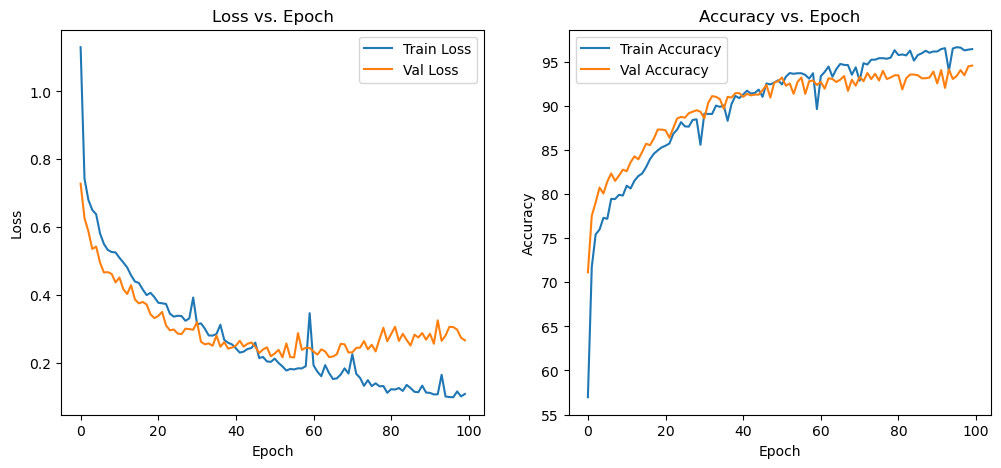

In [32]:
# Plotting the loss and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epoch')

plt.subplot(1, 2, 2)
plt.plot(train_acc_history, label='Train Accuracy')
plt.plot(val_acc_history, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epoch')

plt.show()

In [33]:
from sklearn.model_selection import KFold
# Assuming features and targets are numpy arrays
features = np.vstack((featuresTrain.numpy(), featuresTest.numpy()))
targets = np.hstack((targetsTrain.numpy(), targetsTest.numpy()))

k_folds = 10
num_epochs = 50
kfold = KFold(n_splits=k_folds, shuffle=True)

# K-fold Cross Validation model evaluation
results = []

In [35]:
for fold, (train_ids, val_ids) in enumerate(kfold.split(features)):
    # Split the data
    train_features, val_features = features[train_ids], features[val_ids]
    train_targets, val_targets = targets[train_ids], targets[val_ids]

    # Convert to PyTorch tensors
    train_features = torch.tensor(train_features, dtype=torch.float32)
    val_features = torch.tensor(val_features, dtype=torch.float32)
    train_targets = torch.tensor(train_targets, dtype=torch.long)
    val_targets = torch.tensor(val_targets, dtype=torch.long)

    # Create DataLoader
    train_dataset = TensorDataset(train_features, train_targets)
    val_dataset = TensorDataset(val_features, val_targets)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

    # Initialize the model
    model = CNNModel()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        for features_batch, targets_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(features_batch)
            loss = criterion(outputs, targets_batch)
            loss.backward()
            optimizer.step()

    # Validation loop
    val_loss = 0.0
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for features_batch, targets_batch in val_loader:
            outputs = model(features_batch)
            loss = criterion(outputs, targets_batch)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += targets_batch.size(0)
            correct += (predicted == targets_batch).sum().item()

    val_acc = 100. * correct / total
    results.append(val_acc)
    print(f'Fold {fold + 1}, Validation Accuracy: {val_acc:.2f}%')

# Print the results
mean_val_accuracy = np.mean(results)
std_val_accuracy = np.std(results)
print(f'K-Fold Cross Validation Results for {k_folds} folds')
print(f'Average Accuracy: {mean_val_accuracy:.2f}%')
print(f'Standard Deviation of Validation Accuracy: {std_val_accuracy:.2f}%')

Fold 1, Validation Accuracy: 89.54%
Fold 2, Validation Accuracy: 89.38%
Fold 3, Validation Accuracy: 92.07%
Fold 4, Validation Accuracy: 90.05%
Fold 5, Validation Accuracy: 92.75%
Fold 6, Validation Accuracy: 94.26%
Fold 7, Validation Accuracy: 92.91%
Fold 8, Validation Accuracy: 92.74%
Fold 9, Validation Accuracy: 91.05%
Fold 10, Validation Accuracy: 91.72%
K-Fold Cross Validation Results for 10 folds
Average Accuracy: 91.65%
Standard Deviation of Validation Accuracy: 1.53%


In [36]:
# Example k-fold cross-validation results. Shuffles the dataset so you are training different times to see if overfitting occurs
validation_accuracies = results

# Calculate the mean and standard deviation
mean_val_accuracy = np.mean(validation_accuracies)
std_val_accuracy = np.std(validation_accuracies)

print(f'Average Validation Accuracy: {mean_val_accuracy:.2f}%')
print(f'Standard Deviation of Validation Accuracy: {std_val_accuracy:.2f}%')

# Assuming you have the training accuracy
train_accuracy = 93.0  # example training accuracy

print(f'Training Accuracy: {train_accuracy:.2f}%')

# Determine overfitting
if train_accuracy > mean_val_accuracy + std_val_accuracy:
    print("Potential overfitting detected: Training accuracy is significantly higher than validation accuracy.")
else:
    print("No significant overfitting detected.")


Average Validation Accuracy: 91.65%
Standard Deviation of Validation Accuracy: 1.53%
Training Accuracy: 93.00%
No significant overfitting detected.
